In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm,kstest,ttest_1samp,ttest_ind,levene
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data=pd.read_csv('/Users/rickie/Desktop/statistics_by_python/gender_test.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
Temperature    130 non-null float64
Gender         130 non-null int64
HeartRate      130 non-null int64
dtypes: float64(1), int64(2)
memory usage: 3.1 KB


In [10]:
miu=98.6
n=len(data)
z_stat=(data['Temperature'].mean()-miu)/data['Temperature'].std()/np.sqrt(n)
z_stat

-0.04196017917203307

In [17]:
norm.ppf(0.025)
#由于z-stat<critical value(-1.96),因此不能拒绝原假设，认为人体体温的总体均值与98.6华氏度没有显著差异
#事实上，data['Temperature'].mean()=98.25

-1.9599639845400545

In [64]:
ttest_1samp(data['Temperature'],98.2)
#用于检验一列数据的均值与0的差异是否显著，与样本和总体均值的检验不是一回事！

Ttest_1sampResult(statistic=0.7655892340161272, pvalue=0.44531924999667094)

In [20]:
kstest(data['Temperature'],'norm')
#p值<0.05,因此拒绝原假设，即不服从正态分布

KstestResult(statistic=1.0, pvalue=0.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1d1367b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1d136e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1d136390>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1d13d518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1d13d860>],
 'means': []}

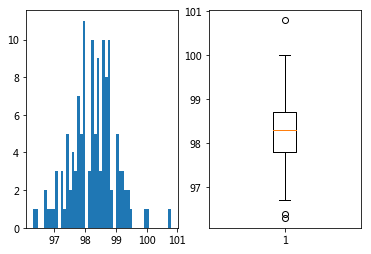

In [71]:
fig=plt.figure()
ax=fig.add_subplot(1,2,1)
ax.hist(data['Temperature'],bins=50)
ax2=fig.add_subplot(1,2,2)
ax2.boxplot(data['Temperature'])

In [31]:
data['Temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: Temperature, dtype: float64

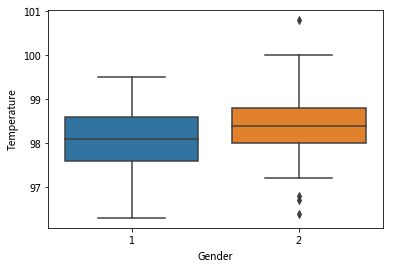

In [36]:
sns.boxplot(x=data['Gender'],y=data['Temperature'])

In [ ]:
# 两变量t检验 零假设:两个样本是否具有相同的均值

In [88]:
ttest_ind(data[data['Gender']==1]['Temperature'],data[data['Gender']==2]['Temperature'])
# p<0.05,因此拒绝原假设，即男女体温不同

Ttest_indResult(statistic=-2.2854345381654984, pvalue=0.02393188312240236)

In [86]:
levene(data[data['Gender']==1]['Temperature'],data[data['Gender']==2]['Temperature'])
# 如果返回结果的p值远大于0.05，那么我们认为两总体具有方差齐性。

LeveneResult(statistic=0.06354951292025163, pvalue=0.8013756068102883)

In [92]:
formula='Temperature~Gender'
model=ols(formula,data).fit()
anova_lm(model)
#拒绝体温与性别无关的假设，得出有关的结论

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,2.718769,2.718769,5.223211,0.023932
Residual,128.0,66.626154,0.520517,NaN,NaN


In [96]:
data[['Temperature','Gender']].corr()

,Temperature,Gender
Temperature,1.000000,0.198006
Gender,0.198006,1.000000
